In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

### Importing the Dataset

In [2]:
#Importing the "Cancer" dataset

df = pd.read_csv("C:\\Users\\91988\\Downloads\\cancer.csv")
df

,id,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


<span style="color:red">Understanding the raw Dataset</span>

<span style="color:blue">From the above, We can see that the given dataset has 683 rows and 11 columns.</span>

<span style="color:blue">Class is the dependent variable or the target value which means Class is the value that we want to predict from the dataset.</span>

<span style="color:blue">Also, there are 10 other variables other than Class which are known as the predictors' variables.</span>

### Dropping "Id" Column 

In [3]:
#Using pandas "drop" attribute to drop the "id" column from the cancer dataset as it is not required for the further analysis

df.drop("id", axis = 1, inplace= True)
df.head()

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### Checking Data types of all columns to get the basic insights from the data

In [4]:
#Using pandas "dtypes" function to get the data type of all columns in the dataframe

df.dtypes

Clump Thickness      int64
UofCSize             int64
UofCShape            int64
Marginal Adhesion    int64
SECSize              int64
Bare Nuclei          int64
Bland Chromatin      int64
Normal Nucleoli      int64
Mitoses              int64
Class                int64
dtype: object

<span style="color:blue"> From the above result, it is evident that there are just numerical (quantitative) variables in the given dataset, which are in the 64-bit integer format.</span>

### Missing Values 

__It is important to check the missing values in the dataframe because if the dataframe has missing values, the data can lose can lose expressiveness, which can lead to weak and biased analyses__

In [5]:
#Using pandas "isnull" function to check if there is any missing values in the dataframe

df.isnull().sum()

Clump Thickness      0
UofCSize             0
UofCShape            0
Marginal Adhesion    0
SECSize              0
Bare Nuclei          0
Bland Chromatin      0
Normal Nucleoli      0
Mitoses              0
Class                0
dtype: int64

<span style="color:blue">From the above results, it can be said that there are no missing values in the dataframe</span>

### Key Statistics

### Describe Function 

In [6]:
# Using pandas "descrie" attribute to get the overall statistical summary of the given dataframe

df.describe()

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<span style="color:red"> **KEY INSIGHTS** </span>


<span style="color:blue">The dependent variable Class contains two values, that is, 2 for benign and 4 for malignant, here from the above statistics, it can be seen that mean of class variable is 2.699 which is closer to 2 signifying that there are more of benign's cases. Also, the median of class attribute is 2 which is fairly closer to the mean of class, therefore class variable is symmetrically distributed. </span>

<span style="color:blue"> The standard deviation of Class is 0.95, which is relatively small, stating that datapoints in class variable are very close to the mean. </span>

<span style = "color:blue"> The mean is greater than median in many columns such as, Uniformity of cell shape, Uniformity of cell size, Marginal adhesion, SEC size, Bare Nuclei and Normal Nucleoli indicating the skewness in the data. </span>

## Exploratory Data Analysis 

### Correlation

In [7]:
#Using pandas "corr" function to check the correlation among variables

dfcorr = df.corr()
dfcorr

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
UofCSize,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
UofCShape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
SECSize,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


<span style="color:blue"> From the above results, the correlation values for Clump thickness, Uniformity of cell size, Uniformity of cell shape, Marginal Adhesion, Bare Nuclei, Bland Chromatin and Normal Nucleoli with the Class variable (dependent varaible) is quite high or we can say there is a strong positive correlation between these given independent variable and the class variable.</span>

<span style ="color:blue"> However, the correlation between Mitoses and Class is just moderate. </span>

### Correlation visualization

<AxesSubplot:>

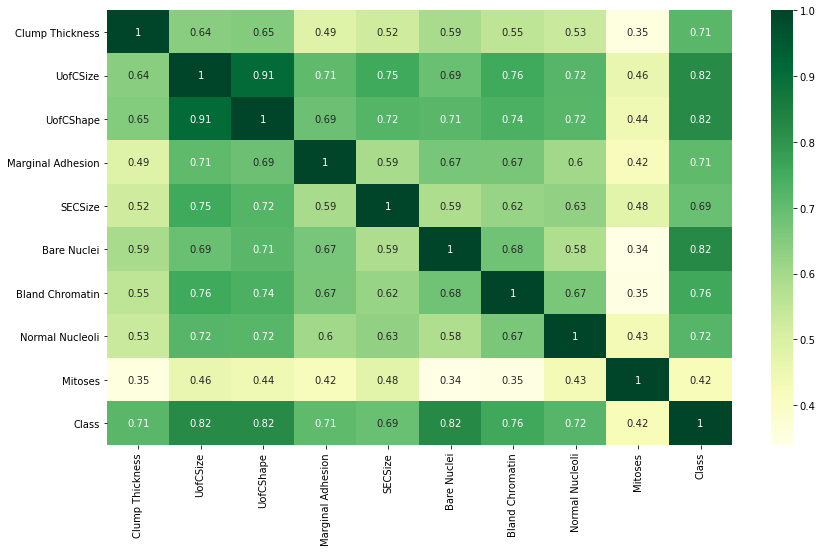

In [8]:
#Using seaborn's "heatmap" to visualize the correlation among variables 

plt.figure(figsize=(14,8))
sns.heatmap(dfcorr, annot = True, cmap = "YlGn")

<span style="color:blue">The above figure shows the correlation between different variables in the dataset. The darker the color, the stronger the correlation among variables. </span>

<span style = "color:blue"> It can be seen that, there is a strong positive correlation between Uniformity of cell size and Uniformity of cell shape. Apart from this, the correlation for Bare Nuclei, Uniformity of Cell shape and Uniformity of cell size with Class is the same (strong positive correaltion). </span> 

<span style = "color:blue"> While, Mitoses is weakly correlated with Bare Nuclei and Bland Chromatin. </span>

### Analyzing feature patterns using visualization

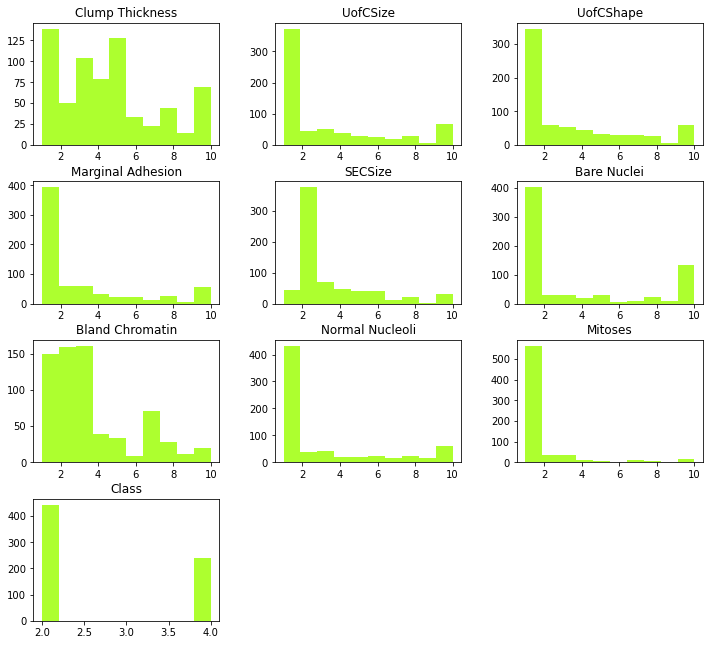

In [9]:
#Using matplotlib's "hist" function to visualize distribution of data for each column in the dataset

df.hist(figsize = (12,11), grid= False, color = "greenyellow")
plt.show()

<span style="color:blue">From the above graphs, it can be seen that data is evenly distributed to some extent in "Clump Thickness". </span>
    
<span style="color:blue"> While, in the case of other variables in the dataset, distribution is skewed to the right</span>

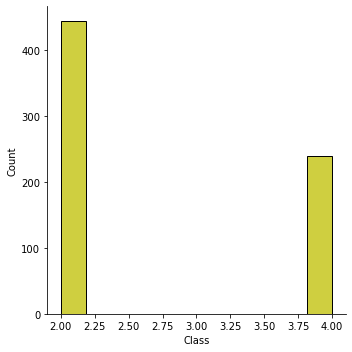

In [14]:
#Using seaborn's "catplot" function to generate bar graph for class variable

sns.displot(data= df, x = "Class", kind = "hist", color = "y")

<AxesSubplot:>

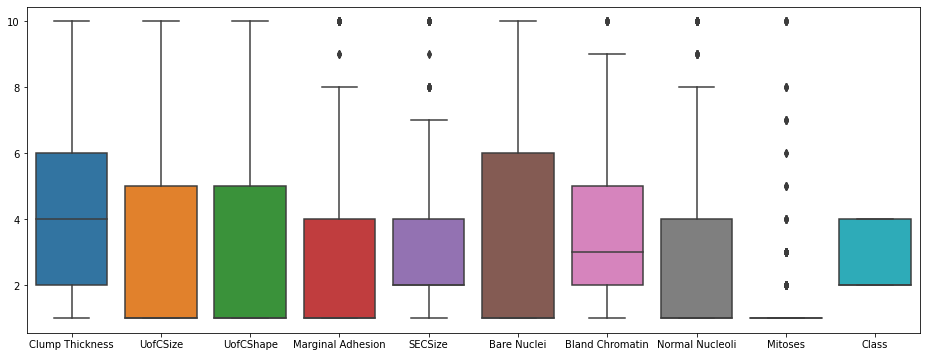

In [10]:
#Using seaborn's "boxplot" function to generate boxplot for each column in the dataset in order to find outliers

plt.figure(figsize =(16,6))
sns.boxplot(data= df)

<span style="color:blue">From the above boxplots, it is depicted that there are significant ouliers in Mitoses column. </span>
    
<span style="color:blue">Also, there are four other columns such as, Marginal Adhesion, SEC size, Bland Chromatin and Normal Nucleoli which contain unsual values</span>

### Data Preprocessing 

<span style = "color:  green"> It is important to prepare data before model building. In this stage, data will be divided in train and test split and standardscaler will be so that distribution can have 0 mean and 1 standard deviation </span>

In [11]:
#Defining the variables

#defining "x" or independent variables in the dataset

x = df.drop("Class", axis = 1).to_numpy()  #using pandas "drop" attribute to drop Class column from x as it is a target variable 

#placing target variable "Class" in y variable

y = df["Class"].to_numpy() #Assigning y variable to "Class" column as it is the dependent variable in the dataset 


<span style="color: blue">In the above case, Class is dropped from the x variable as it is the dependent variable that we want to predict, therefore variable "x" have all other 9 variables as independent variables. and Class is placed in the target variable "y".</span>

In [12]:
#Randomly splitting data into training and testing data using function train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y, test_size=0.2,random_state=100)  

#the test_size parameter sets the proportion of data that is split into the testing set. 
#Thus, here 20% of data samples will be utilized for testing

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 137
number of training samples: 546


<span style="color:blue">After splitting the data into training and testing sets, we can see that 137 samples will be used for testing the data and 546 will be used for training</span>

In [13]:
#Using "StandardScaler" to standardize the data

sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

<span style="color: blue;"> We standardized the above data using StandardScaler function of preprocessing module of sklearn library so that it can organise the mentioned data in standard normal distribution.</span>

### Model Building 

In [17]:
#Using sklearn's neural_network to create neural network script

mlp = MLPClassifier(hidden_layer_sizes=(9,4,2),
                   activation="relu", solver = "adam",
                   max_iter=10000, random_state=100)

mlp.fit(x_train2, y_train)
predictions = mlp.predict(x_test2)

#Using sklearn's classification_report and confusion_matrix to print evaluation report and matrix

matrix = confusion_matrix(y_test,predictions)
print("Neural Network Confusion Matrix : \n", matrix)  

classification = classification_report(y_test,predictions)
print("Neural Network Classification Report : \n", classification)  

Neural Network Confusion Matrix : 
 [[88  1]
 [ 3 45]]
Neural Network Classification Report : 
               precision    recall  f1-score   support

           2       0.97      0.99      0.98        89
           4       0.98      0.94      0.96        48

    accuracy                           0.97       137
   macro avg       0.97      0.96      0.97       137
weighted avg       0.97      0.97      0.97       137



### Decision Making 